<h1 style="color: #FF5733; font-size: 56px;"> Cyber Bullying prevention</h1>

<h1 style="color: pink; font-size: 36px;">Digital Defender: Game Wrangling and Analysis File</h1>

<h1 style="color: green; font-size: 19px;"> Data details

This script uses the os and pandas libraries to manage and process multiple CSV files stored in the same directory. It iterates over a list of CSV filenames, reads each file into a pandas DataFrame, and then prints essential details such as column names, data types, the shape of the DataFrame, and a preview of the first few rows. If a file can’t be read due to an error, the code prints an error message and continues with the next file, ensuring a clear separation between the outputs of each file. This setup provides a quick and efficient way to explore and understand the structure and content of your CSV data.

In [8]:
import os
import pandas as pd

# List of CSV file names present in the folder.
csv_file_list = [
    "aggression_parsed_dataset.csv",
    "attack_parsed_dataset.csv",
    "Cyberbullying_Dataset_Summary_Table__Detailed_.csv",
    "kaggle_parsed_dataset.csv",
    "twitter_sexism_parsed_dataset.csv",
    "twitter_racism_parsed_dataset.csv",
    "twitter_parsed_dataset.csv",
    "toxicity_parsed_dataset.csv",
    "youtube_parsed_dataset.csv",
    "Aggressive_All.csv",
    "Non_Aggressive_All.csv"

]

# Loop through each CSV file in the list.
for file_name in csv_file_list:
    # Since the CSV files are in the same folder as the notebook,
    # the file path is simply the file name.
    file_path = os.path.join(file_name)
    
    # Print header for current file processing.
    print(f"=== Processing File: {file_name} ===")
    
    # Try to read the CSV file into a pandas DataFrame.
    try:
        data_frame = pd.read_csv(file_path)
    except Exception as error:
        print(f"Error reading {file_name}: {error}")
        print("-" * 60 + "\n")
        continue  # Skip to the next file if an error occurs.
    
    # Display the column names of the DataFrame.
    print("Column Names:")
    print(data_frame.columns.tolist())
    
    # Display the data types of each column.
    print("\nData Types:")
    print(data_frame.dtypes)
    
    # Display the number of rows and columns in the DataFrame.
    num_rows, num_columns = data_frame.shape
    print(f"\nNumber of Rows: {num_rows}")
    print(f"Number of Columns: {num_columns}")
    
    # Display the first 5 rows of the DataFrame as a preview.
    print("\nFirst 5 Rows:")
    print(data_frame.head())
    
    # Print a separator line after processing each file.
    print("\n" + "-" * 60 + "\n")

=== Processing File: aggression_parsed_dataset.csv ===
Column Names:
['index', 'Text', 'ed_label_0', 'ed_label_1', 'oh_label']

Data Types:
index           int64
Text           object
ed_label_0    float64
ed_label_1    float64
oh_label        int64
dtype: object

Number of Rows: 115864
Number of Columns: 5

First 5 Rows:
   index                                               Text  ed_label_0  \
0      0  `- This is not ``creative``.  Those are the di...    0.900000   
1      1  `  :: the term ``standard model`` is itself le...    1.000000   
2      2    True or false, the situation as of March 200...    1.000000   
3      3   Next, maybe you could work on being less cond...    0.555556   
4      4               This page will need disambiguation.     1.000000   

   ed_label_1  oh_label  
0    0.100000         0  
1    0.000000         0  
2    0.000000         0  
3    0.444444         0  
4    0.000000         0  

------------------------------------------------------------

=== Pr

<h1 style="color: green; font-size: 19px;"> Data wrangling

The script begins by loading the CSV file into a DataFrame, which serves as the initial dataset. It then checks for duplicate rows by counting and printing their number, and subsequently removes any duplicates found. In addition, the script identifies rows that are entirely empty—meaning all values are missing—counts and prints these empty rows, and removes them from the DataFrame. Finally, it saves the cleaned DataFrame to a new CSV file, ensuring that all modifications are preserved.

In [ ]:
import pandas as pd

# Specify the file name (update with your file name)
file_name = 'your_file.csv' #put the file we want to check 

# Load the CSV file into a DataFrame
df = pd.read_csv(file_name)

# Check for duplicate rows
num_duplicates = df.duplicated().sum()
print(f"Found {num_duplicates} duplicate rows.")

# Remove duplicate rows, if any
if num_duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicate rows have been removed.")

# Check for empty rows (rows where all cells are NaN)
num_empty_rows = df.isnull().all(axis=1).sum()
print(f"Found {num_empty_rows} empty rows.")

# Remove empty rows, if any
if num_empty_rows > 0:
    df = df.dropna(how='all')
    print("Empty rows have been removed.")

# Save the cleaned DataFrame to a new CSV file
clean_file_name = 'your_file_cleaned.csv'# 
df.to_csv(clean_file_name, index=False)
print(f"Cleaned data has been saved to {clean_file_name}.")

<h1 style="color: #FF5733; font-size: 19px;">Natural language processing  and analysis in file 

Overview of the Process

In our pipeline, we began by loading and preprocessing a cleaned CSV file containing messages. We removed any rows with empty messages and standardized the text by converting it to lowercase and stripping extra whitespace. This ensured that our subsequent analysis was performed on a consistent and high-quality dataset.

Emotion Analysis Approaches

We employed two distinct emotion analysis methods. First, we used a lexicon-based approach with NRCLex. NRCLex utilizes the NRC Emotion Lexicon, which maps words to basic emotions such as anger, fear, joy, sadness, and disgust. By analyzing the frequency of these emotion-related words in a message, NRCLex returns a list of top emotions with their associated scores. This method is fast and interpretable, providing a straightforward snapshot of the emotional cues in the text.

In addition, we applied a transformer-based approach using a pretrained model, specifically “bhadresh-savani/distilbert-base-uncased-emotion”. This model is a distilled version of BERT that has been fine-tuned for emotion classification. It predicts multiple emotion categories—such as anger, joy, sadness, fear, love, and surprise—by returning a probability distribution over these labels for each message. We chose this model because DistilBERT is lighter and faster than the full BERT model while maintaining strong performance, and because it offers a detailed, probability-based classification that can capture nuanced emotional content.

Creating the Trigger Column

After obtaining the transformer-based emotion predictions, we created an additional column labeled “trigger.” This column identifies the dominant emotion for each message by selecting the emotion with the highest probability from the transformer’s output. This trigger word serves as an immediate indicator of the primary emotional signal in a message, which can be very useful for further analysis or for developing interactive tools such as quizzes aimed at cyber bullying prevention.

Saving the Results

Finally, the enriched DataFrame—now containing the original messages, NRCLex emotion outputs, transformer-based emotion probabilities, and the trigger column—is saved in both CSV and JSON formats. The CSV file offers ease of use for further data manipulation or viewing in spreadsheet applications, while the JSON format is ideal for integration with web-based applications and interactive educational tools.

By combining these methods, we achieve a comprehensive understanding of the emotional content in each message, enabling more informed analysis and effective strategies for cyber bullying prevention and educational initiatives.

In [ ]:
import pandas as pd
import nltk
from nrclex import NRCLex
from transformers import pipeline
import textwrap
import torch
import os
import multiprocessing as mp
import logging

# Set logging level for transformers to suppress informational messages
logging.getLogger("transformers").setLevel(logging.ERROR)

# Verify PyTorch installation
print("Installed PyTorch version:", torch.__version__)
print("Number of GPUs available:", torch.cuda.device_count())

# Download necessary NLTK data (if needed)
nltk.download('vader_lexicon')

# ------------------- Load and Preprocess Data -------------------
file_name = "Aggressive_All_cleaned.csv"
df = pd.read_csv(file_name)
print("Columns in dataset:", df.columns.tolist())

# Remove rows where 'Message' is missing or empty
df = df[~(df['Message'].isnull() | (df['Message'].astype(str).str.strip() == ""))]
print("Number of rows after cleaning empty messages:", len(df))

# Standardize messages: convert to lowercase and strip extra whitespace
df['Message'] = df['Message'].astype(str).str.lower().str.strip()

# ------------------- Define Emotion Analysis Functions -------------------

def get_nrc_emotions(text):
    """
    Uses NRCLex to analyze the text and returns the top emotions as a list of (emotion, score) tuples.
    """
    emotion_obj = NRCLex(text)
    return emotion_obj.top_emotions

def convert_transformer_results(results):
    """Convert a list of dictionaries to a single dictionary mapping emotion labels to scores."""
    return {item['label']: item['score'] for item in results}

def process_batch(batch):
    """
    Processes a batch of messages using the transformer pipeline.
    Each process initializes its own pipeline instance.
    """
    # Initialize the pipeline inside each process using CPU (change device=0 if using GPU)
    emotion_classifier = pipeline(
        "text-classification", 
        model="bhadresh-savani/distilbert-base-uncased-emotion", 
        framework="pt",        # explicitly use PyTorch
        device=-1,             # use CPU; change to device=0 if GPU is available
        top_k=None,            # equivalent to return_all_scores=True
        truncation=True        # truncate texts longer than model's max length
    )
    results = emotion_classifier(batch)
    # Convert each result (a list of dictionaries) into a single dictionary
    processed = [convert_transformer_results(result) for result in results]
    return processed

# ------------------- Parallel Processing for Transformer Emotions -------------------
def main():
    # For faster experimentation, you can sample a subset (remove or adjust sampling as needed)
    sample_size = 5000  # change or remove to process full dataset
    df_sample = df.sample(n=sample_size, random_state=42)
    messages = df_sample['Message'].tolist()
    
    batch_size = 32  # adjust based on your hardware
    batches = [messages[i:i+batch_size] for i in range(0, len(messages), batch_size)]
    
    print(f"Total messages in sample: {len(messages)}")
    print(f"Total batches (batch size={batch_size}): {len(batches)}")
    
    # Use multiprocessing Pool to process batches in parallel
    with mp.Pool(mp.cpu_count()) as pool:
        transformer_results = pool.map(process_batch, batches)
    
    # Flatten the list of lists into a single list for each message's transformer predictions
    transformer_emotions = [item for sublist in transformer_results for item in sublist]
    df_sample['transformer_emotions'] = transformer_emotions
    
    # Process NRCLex emotions (this step remains sequential)
    print("Processing NRCLex emotions...")
    df_sample['nrc_emotions'] = df_sample['Message'].apply(get_nrc_emotions)
    
    # ------------------- Add 'trigger' Column -------------------
    # For each row, pick the emotion from transformer_emotions with the highest probability.
    df_sample['trigger'] = df_sample['transformer_emotions'].apply(
        lambda x: max(x, key=x.get) if isinstance(x, dict) and len(x) > 0 else None
    )
    
    # ------------------- Display Sample Results -------------------
    print("\n=== Sample Data with Emotion Predictions and Trigger Word ===")
    sample_display = df_sample[['Message', 'nrc_emotions', 'transformer_emotions', 'trigger']].head(5)
    for idx, row in sample_display.iterrows():
        print("-" * 80)
        print("Message:")
        print(textwrap.fill(row['Message'], width=80))
        print("\nNRCLex Top Emotions:")
        print(row['nrc_emotions'])
        print("\nTransformer-Based Emotions:")
        print(row['transformer_emotions'])
        print("\nTrigger Emotion (Highest Probability):")
        print(row['trigger'])
        print("-" * 80 + "\n")
    
    # ------------------- Save the Updated DataFrame -------------------
    csv_output = "Aggressive_All_with_trigger.csv"
    json_output = "Aggressive_All_with_trigger.json"
    
    df_sample.to_csv(csv_output, index=False)
    df_sample.to_json(json_output, orient='records', lines=True)
    
    print("CSV file saved as:", csv_output)
    print("JSON file saved as:", json_output)

if __name__ == "__main__":
    main()

In case nltk verifiactions are failed u can use this code to bypass it 

In [5]:
# TEMPORARY: bypass SSL error (if it still exists)
import nltk
import ssl

# TEMPORARY: bypass SSL error (if it still exists)
ssl._create_default_https_context = ssl._create_unverified_context

<h1 style="color: #FF5733; font-size: 19px;"> Self assesment tools


This Python script implements an interactive survey aimed at assessing responses to potentially cyberbullying online messages. It leverages advanced natural language processing by integrating a transformer-based emotion classifier and the NRCLex library. Specifically, the script uses the “bhadresh-savani/distilbert-base-uncased-emotion” model from HuggingFace, chosen for its efficiency and accuracy in identifying a range of emotions in text. The transformer model processes each user-provided message to yield a detailed probability distribution across different emotions, while NRCLex offers an alternative view by extracting the top emotions present. Following the automated analysis, the survey asks users to share how the message makes them feel, rate the intensity of their emotions, comment on the overall mood impact, and describe their potential real-life responses. Each response, along with the computed emotion metrics, is stored and eventually saved as a CSV file. This combined approach not only enriches the survey by providing data-driven insights into emotional triggers associated with cyberbullying but also gathers user perceptions that can be further analyzed to develop effective prevention strategies.

<h1 style="color: #FF5733; font-size: 19px;"> 

In [ ]:
##########################SURVEY AND MODEL 
import nltk
from transformers import pipeline
import textwrap
import csv

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('punkt_tab')

# Initialize the transformer-based emotion classifier (using CPU here)
emotion_classifier = pipeline(
    "text-classification",
    model="bhadresh-savani/distilbert-base-uncased-emotion",
    framework="pt",
    device=-1,           # use CPU; change to 0 if GPU is available
    top_k=None,          # returns all scores
    truncation=True
)

def get_transformer_emotions(text):
    """
    Uses the transformer-based model to get emotion probabilities.
    Returns a dictionary mapping each emotion label (friendly names) to its score.
    """
    results = emotion_classifier(text)
    # Convert the raw results to friendlier emotion names
    raw = {item['label']: item['score'] for item in results[0]}
    friendly = {
        "angry": raw.get("anger", 0),
        "sad": raw.get("sadness", 0),
        "happy": raw.get("joy", 0),
        "scared": raw.get("fear", 0),
        "loving": raw.get("love", 0),
        "surprised": raw.get("surprise", 0)
    }
    return friendly

def display_emotion_analysis(message):
    transformer_emotions = get_transformer_emotions(message)
    trigger_emotion = max(transformer_emotions, key=transformer_emotions.get)
    
    print("\n" + "-" * 80)
    print("Here's what we found about your message:")
    print(textwrap.fill(message, width=80))
    print("\nOur tool thinks the message shows these feelings:")
    for label, score in transformer_emotions.items():
        print(f"  {label}: {score:.3f}")
    print("\nThe main feeling is:", trigger_emotion)
    print("-" * 80 + "\n")
    
    return transformer_emotions, trigger_emotion

def interactive_survey():
    """
    Collects survey responses interactively from the user.
    After each message, the tool displays the transformer-based emotion analysis,
    then asks follow-up questions if the user wishes to continue.
    """
    print("🧠 Welcome to the Cyber Bullying Self-Assessment Survey!")
    print("You'll enter examples of online messages and see what feelings our tool detects.")
    print("Then you'll answer follow-up questions about how the message makes you feel.")
    print("If you choose not to answer follow-up questions, the survey will end.")
    print("Type 'quit' at any prompt to exit.\n")
    
    responses = []
    
    while True:
        message = input("✉️ Enter an online message which has affected you tody: ").strip()
        if message.lower() == 'quit':
            break
        
        # Display emotion analysis for the entered message (only transformer-based)
        transformer_emotions, trigger_emotion = display_emotion_analysis(message)
        
        # Ask if the user wants to answer follow-up questions for this message
        proceed = input("Would you like to answer follow-up questions for this message? (yes/no): ").strip().lower()
        if proceed == 'quit' or proceed != "yes":
            print("No follow-up questions answered. Ending survey.\n")
            break
        
        # Follow-up questions with clear instructions:
        print("\nFollow-Up Questions:")
        print("  1. In your own words, how does this message make you feel? (e.g., 'I feel sad')")
        user_feeling = input("   Your answer: ").strip()
        if user_feeling.lower() == 'quit' or user_feeling == "":
            print("No response provided. Ending survey.\n")
            break

        print("  2. How strong is that feeling on a scale of 1 (not strong) to 10 (very strong)?")
        intensity = input("   Please enter a number between 1 and 10: ").strip()
        if intensity.lower() == 'quit' or intensity == "":
            print("No intensity value provided. Ending survey.\n")
            break

        print("  3. How Does this message affect your overall mood? (Type 'yes' if it does, or 'no' if it doesn't)")
        mood_impact = input("   Your answer: ").strip()
        if mood_impact.lower() == 'quit' or mood_impact == "":
            print("No mood impact response provided. Ending survey.\n")
            break

        print("  4. If you saw this message in real life, what would you do? (e.g., ' ignore, reort')")
        response_action = input("   Your answer: ").strip()
        if response_action.lower() == 'quit' or response_action == "":
            print("No response action provided. Ending survey.\n")
            break

        # Record the response in a dictionary record
        record = {
            "message": message,
            "transformer_emotions": transformer_emotions,
            "trigger": trigger_emotion,
            "user_feeling": user_feeling,
            "intensity": intensity,
            "mood_impact": mood_impact,
            "response_action": response_action
        }
        responses.append(record)
        print("\n✅ Response recorded!\n")
        
        cont = input("Would you like to assess another message? (yes/no): ").strip().lower()
        if cont == 'quit' or cont != "yes":
            print("Thank you for participating!")
            break
    
    return responses

def save_responses_to_csv(responses, filename="survey_responses.csv"):
    """Saves a list of response records to a CSV file."""
    if not responses:
        print("No responses to save.")
        return
    header = responses[0].keys()
    with open(filename, mode="w", newline="", encoding="utf-8") as f:
        import csv
        writer = csv.DictWriter(f, fieldnames=header)
        writer.writeheader()
        for record in responses:
            writer.writerow(record)
    print(f"💾 Responses have been saved to '{filename}'")

if __name__ == "__main__":
    survey_responses = interactive_survey()
    save_responses_to_csv(survey_responses)

This code is designed to analyze survey responses related to cyber bullying by visualizing trends and identifying risk clusters based on user responses. First, it loads survey data from a CSV file and preprocesses the data by converting the ‘intensity’ column to numeric values and transforming the ‘mood_impact’ responses from “yes/no” to a numeric binary format (1 for yes, 0 for no). It then performs a trend analysis by creating bar charts that show the frequency of various trigger emotions (as reported by users) and the average intensity of these emotions.

Next, the code builds a feature matrix using the ‘intensity’ and ‘mood_impact_numeric’ columns to assess risk levels among users. It standardizes these features using StandardScaler and applies the KMeans clustering algorithm (with 3 clusters, in this case) to group users who share similar emotional responses. The resulting clusters are then visualized in a scatter plot, where each point represents a user and is colored by its cluster assignment.

Overall, this analysis provides data-driven insights by revealing which trigger emotions are most common, how intensely they affect users, and by identifying groups of users who might be at higher risk of adverse emotional impacts from cyber bullying.

In [ ]:
######################################## SURVEY PLOT
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the survey responses CSV file
df = pd.read_csv("survey_responses.csv")

# Inspect the columns
print("Columns in survey data:", df.columns.tolist())

# For trend analysis, we'll use:
# - 'trigger' (categorical trigger emotion)
# - 'intensity' (convert to numeric)
# - 'mood_impact' (convert yes/no to 1/0)
df['intensity'] = pd.to_numeric(df['intensity'], errors='coerce')
df['mood_impact_numeric'] = df['mood_impact'].apply(lambda x: 1 if x.strip().lower() == 'yes' else 0)

# 1. Trend Analysis
# a) Frequency of trigger emotions
trigger_counts = df['trigger'].value_counts()
print("\nTrigger Emotion Frequencies:")
print(trigger_counts)

plt.figure(figsize=(8, 6))
trigger_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Frequency of Trigger Emotions")
plt.xlabel("Trigger Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# b) Average intensity by trigger emotion
avg_intensity = df.groupby('trigger')['intensity'].mean()
print("\nAverage Intensity by Trigger Emotion:")
print(avg_intensity)

plt.figure(figsize=(8, 6))
avg_intensity.plot(kind='bar', color='coral', edgecolor='black')
plt.title("Average Intensity by Trigger Emotion")
plt.xlabel("Trigger Emotion")
plt.ylabel("Average Intensity (1-10)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Risk Identification via Clustering
# We create a feature matrix using 'intensity' and 'mood_impact_numeric'
features = df[['intensity', 'mood_impact_numeric']].dropna()

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Determine number of clusters (e.g., 3 clusters)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Add cluster assignments to the DataFrame
df.loc[features.index, 'cluster'] = clusters

print("\nCluster Counts:")
print(df['cluster'].value_counts())

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title("Clustering of Users by Intensity and Mood Impact")
plt.xlabel("Standardized Intensity")
plt.ylabel("Standardized Mood Impact")
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()

# Output insights
print("\nData-Driven Insights:")
print("Trigger Emotion Frequencies:\n", trigger_counts)
print("Average Intensity by Trigger Emotion:\n", avg_intensity)
print("Cluster assignments:\n", df['cluster'].value_counts())

<h1 style="color: #FF5733; font-size: 19px;">Youtube data

Explanation
	1.	VADER Sentiment Analysis:
The script uses NLTK’s VADER (Valence Aware Dictionary and sEntiment Reasoner) to calculate sentiment scores for each comment. The classify_sentiment_vader function computes the compound score—a single metric that summarizes the overall sentiment. If the compound score is below a specified threshold (here, -0.5), the text is flagged as “Aggressive”; otherwise, it is marked as “Non-Aggressive.” Additionally, the complete set of sentiment scores is returned for further analysis.
	2.	Data Loading and Processing:
The CSV file is loaded into a pandas DataFrame. Sentiment analysis is applied to the “Text” column, and two new columns are added: one for the sentiment classification and one for the detailed emotion scores.
	3.	Text Wrapping for Better Output:
A helper function wraps the text in the “Text” column so that when the DataFrame is printed, long comments are neatly formatted over multiple lines.
	4.	Saving the Results:
The updated DataFrame is saved to a new CSV file (“youtube_parsed_dataset_sentiment.csv”), preserving all changes for future reference.

In [ ]:
import pandas as pd
import textwrap
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the VADER lexicon (if not already downloaded)
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

def classify_sentiment_vader(text, threshold=-0.5):
    """
    Classify sentiment using VADER. 
    If the compound score is below the threshold (e.g., -0.5), flag as Aggressive; otherwise, Non-Aggressive.
    Returns the sentiment label along with the complete score dictionary.
    """
    scores = sia.polarity_scores(text)
    sentiment = "Aggressive" if scores['compound'] < threshold else "Non-Aggressive"
    return sentiment, scores

# Load the CSV file containing the YouTube dataset.
df = pd.read_csv("youtube_parsed_dataset.csv")

# Apply VADER sentiment analysis on the "Text" column.
df["sentiment_class"], df["emotion_scores"] = zip(*df["Text"].apply(classify_sentiment_vader))

# Function to wrap long text for display
def wrap_text(text, width=80):
    return "\n".join(textwrap.wrap(text, width=width))

# Create a copy of the DataFrame for printing with wrapped "Text" column.
df_wrapped = df.copy()
df_wrapped["Text"] = df_wrapped["Text"].apply(lambda x: wrap_text(x, width=80))

# Print the DataFrame with wrapped text.
print("Updated DataFrame with Sentiment Analysis:\n")
print(df_wrapped.to_string())

# Save the updated DataFrame to a new CSV file.
df.to_csv("youtube_parsed_dataset_sentiment.csv", index=False)
print("\nSentiment analysis complete. Results saved to 'youtube_parsed_dataset_sentiment.csv'.")

AGe distribution chart- 
The plot indicates that younger individuals dominate the aggressive comment space, while a relatively small portion of older users also contribute to it. This insight can inform targeted anti-bullying measures and help platforms prioritize which age groups may need the most support or intervention.

Distribution of comment-
Overall, the data suggests that when users post aggressive comments, they typically do so in brief bursts rather than in extensive text. This insight can inform moderation strategies (e.g., scanning for specific offensive words or phrases in short messages) and help prioritize the detection of quick, hostile remarks.

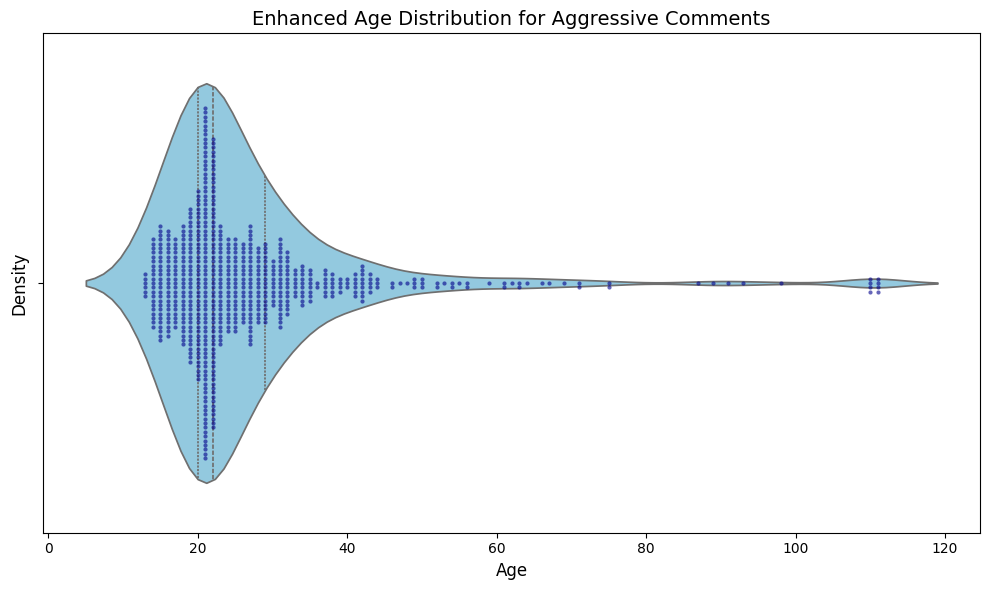

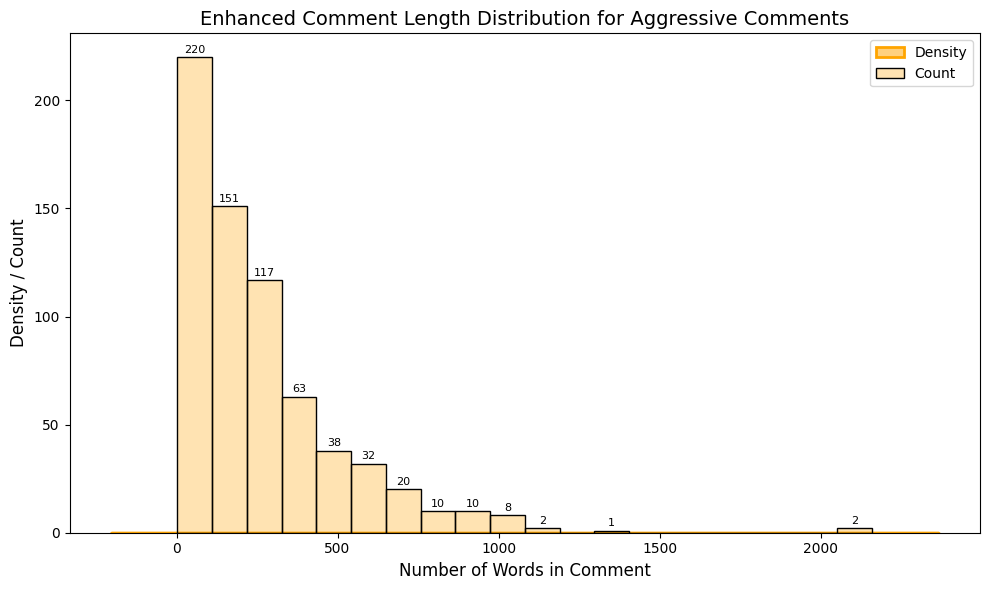

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file with sentiment analysis results
df = pd.read_csv("youtube_parsed_dataset_sentiment.csv")

# Filter for rows flagged as "Aggressive" and create a copy to avoid SettingWithCopyWarning
df_aggressive = df[df['sentiment_class'] == 'Aggressive'].copy()

# Create a new column for comment length (number of words)
df_aggressive['comment_length'] = df_aggressive['Text'].apply(lambda x: len(str(x).split()))

# ---------------- Enhanced Age Distribution ----------------
plt.figure(figsize=(10, 6))
sns.violinplot(x=df_aggressive['Age'], color='skyblue', inner='quartile')
sns.swarmplot(x=df_aggressive['Age'], color='darkblue', size=3, alpha=0.6)
plt.title("Enhanced Age Distribution for Aggressive Comments", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.tight_layout()
plt.show()




# Plot the KDE + Histogram
plt.figure(figsize=(10, 6))

# Plot the KDE (Density)
ax = sns.kdeplot(
    data=df_aggressive,
    x='comment_length',
    fill=True,
    color='orange',
    alpha=0.5,
    linewidth=2,
    label="Density"
)

# Plot the Histogram
hist_plot = sns.histplot(
    data=df_aggressive,
    x='comment_length',
    bins=20,
    color='orange',
    edgecolor='black',
    alpha=0.3,
    label="Count"
)

# Annotate each histogram bar with its count
for patch in hist_plot.patches:
    height = patch.get_height()
    if height > 0:  # Only annotate bars that have a height > 0
        x_position = patch.get_x() + patch.get_width() / 2
        hist_plot.text(
            x_position,
            height + 1,             # Slight offset above the bar
            f'{int(height)}',       # Convert float to int for a clean label
            ha='center',
            va='bottom',
            fontsize=8
        )

plt.title("Enhanced Comment Length Distribution for Aggressive Comments", fontsize=14)
plt.xlabel("Number of Words in Comment", fontsize=12)
plt.ylabel("Density / Count", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

This code loads a CSV file containing cyber bullying data, filters out non-bullying entries, and preprocesses the text. It then creates a large, interactive donut chart using Plotly to show the distribution of bullying categories (with labels and percentages). When you click on a segment of the donut chart, a drill-down callback generates and displays a word cloud for that specific category, enabling you to explore the key terms used in each bullying category directly in a Jupyter Notebook.

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import re, string
from wordcloud import WordCloud, STOPWORDS
from io import BytesIO
import base64
import ipywidgets as widgets
from IPython.display import display

# ------------------ Load and Preprocess Data ------------------
df = pd.read_csv("cb_multi_labeled_balanced.csv")
# Filter out rows labeled as 'not_cyberbullying'
df = df[df['label'] != 'not_cyberbullying']

def preprocess_text(text):
    """Lowercase, remove punctuation, digits, and extra spaces."""
    text = str(text).lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['cleaned_text'] = df['text'].apply(preprocess_text)

# ------------------ Create Donut Chart ------------------
label_counts = df['label'].value_counts()
labels = label_counts.index.tolist()
counts = label_counts.values.tolist()

# Create an interactive donut chart using FigureWidget
fig = go.FigureWidget(data=[go.Pie(labels=labels, values=counts, hole=0.4,
                                    marker=dict(colors=px.colors.qualitative.Plotly))])
fig.update_layout(title_text="Distribution of Cyber Bullying Categories",
                  width=1000, height=800)

# ------------------ Word Cloud Generation Function ------------------
def generate_wordcloud(label):
    subset = df[df['label'] == label]
    text_data = " ".join(subset['cleaned_text'])
    stopwords = set(STOPWORDS)
    wc = WordCloud(width=800, height=400, background_color="white",
                   stopwords=stopwords, collocations=False).generate(text_data)
    buffer = BytesIO()
    wc.to_image().save(buffer, format="PNG")
    encoded_image = base64.b64encode(buffer.getvalue()).decode()
    return encoded_image

# ------------------ Output Widget for Word Cloud ------------------
wordcloud_out = widgets.Output()

# ------------------ Callback Function for Drill Down ------------------
def handle_click(trace, points, state):
    if points.point_inds:
        idx = points.point_inds[0]
        selected_label = labels[idx]
        encoded_image = generate_wordcloud(selected_label)
        with wordcloud_out:
            wordcloud_out.clear_output(wait=True)
            display(widgets.HTML(value=f"<h2>Word Cloud for '{selected_label}' Category</h2>"))
            display(widgets.Image(value=base64.b64decode(encoded_image), format='png', width=800, height=400))

# Attach the click event to the donut chart's Pie trace
fig.data[0].on_click(handle_click)

# ------------------ Display the Visualization ------------------
display(fig)
display(wordcloud_out)